In [1]:
from sklearn.metrics import classification_report

import onnx
import onnxruntime
import idx2numpy
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
onnx_model = onnx.load("resnet_fashion_mnist.onnx")
onnx.checker.check_model(onnx_model)

In [3]:
sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession('resnet_fashion_mnist.onnx', sess_options)

In [4]:
input_name = sess.get_inputs()[0].name
print("input name", input_name)
input_shape = sess.get_inputs()[0].shape
print("input shape", input_shape)
input_type = sess.get_inputs()[0].type
print("input type", input_type)

input name input
input shape ['batch_size', 1, 28, 28]
input type tensor(float)


In [5]:
output_name = sess.get_outputs()[0].name
print("output name", output_name)
output_shape = sess.get_outputs()[0].shape
print("output shape", output_shape)
output_type = sess.get_outputs()[0].type
print("output type", output_type)

output name output
output shape ['batch_size', 10]
output type tensor(float)


In [6]:
test_images = idx2numpy.convert_from_file('data/raw/t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('data/raw/t10k-labels-idx1-ubyte')

# Batch Inference

In [7]:
batch_inf_imgs = []
for test_image in test_images:
    test_image = test_image / 255.
    test_image = test_image.astype(np.float32)
    test_image = np.expand_dims(test_image, axis=0)
    batch_inf_imgs.append(test_image)

batch_inf_imgs = np.array(batch_inf_imgs)

In [13]:
y_pred = []
for img in batch_inf_imgs:
    results = sess.run([output_name], {input_name: np.expand_dims(img, axis=0)})[0]
    y_pred.append(np.argmax(results))

In [14]:
# y_pred = np.argmax(results, 1)
y_true = test_labels

In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.93      0.95      0.94      1000
           2       0.71      0.70      0.71      1000
           3       0.77      0.79      0.78      1000
           4       0.69      0.69      0.69      1000
           5       0.95      0.86      0.90      1000
           6       0.53      0.53      0.53      1000
           7       0.85      0.93      0.89      1000
           8       0.90      0.92      0.91      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



# Single Inference

In [16]:
labels = [
    'T-shirt-Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [22]:
img = test_images[0]
img = img / 255.
img = img.astype(np.float32)
img = np.expand_dims(img, axis=0)

In [25]:
results = sess.run([output_name], {input_name: np.expand_dims(img, axis=0)})[0]

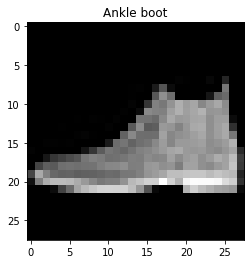

In [26]:
plt.title(labels[np.argmax(results[0])])
plt.imshow(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2RGB))